# Click Patterns


In [37]:

import os
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


def datetime_to_deltas(series, delta=np.timedelta64(1, 's')):
    t0 = series.min()
    return ((series-t0)/delta).astype(np.uint32)

def format_series(x):
    w = 600
    n = x.max()+1
    l = int(np.ceil(n/float(w))*w)
    c = np.zeros(l, dtype=np.float32)
    np.add.at(c, x.values, 1)    
    return c.reshape((-1,w))
        

In [ ]:
with open(os.path.join('cache/train_test_base.pkl'), 'rb') as f:
    df = pickle.load(f)        
    df = df.reset_index(drop=True)
    

In [3]:
df['t'] = datetime_to_deltas(df.click_time)
        

In [40]:
def heat_plot(df, feature_name, time_column):
    nrows = 2
    ncols = 5
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(18, 9))
    idx = 0

    axes[0][0].invert_yaxis()
    axes[0][0].set_yticks(np.arange(0, 144*4, 144), False)
    axes[0][0].set_xticks(np.arange(0, 60*10, 60), False)

    most_common = df[feature_name].value_counts().index.values
    for r in range(nrows):
        for c in range(ncols):
            feature_value = most_common[idx]
            x = df[df[feature_name]==feature_value][time_column]
            v = format_series(x)
            if v is not None:
                v += 1 # adding 1 so vmin is not 0 (to apply log)
                ax = axes[r][c]
                ax.set_title('{}:{}'.format(feature_name, feature_value))
                c = ax.pcolormesh(v, norm=LogNorm(vmin=1, vmax=pix.max()), cmap='afmhot')                
            idx += 1
    plt.show()

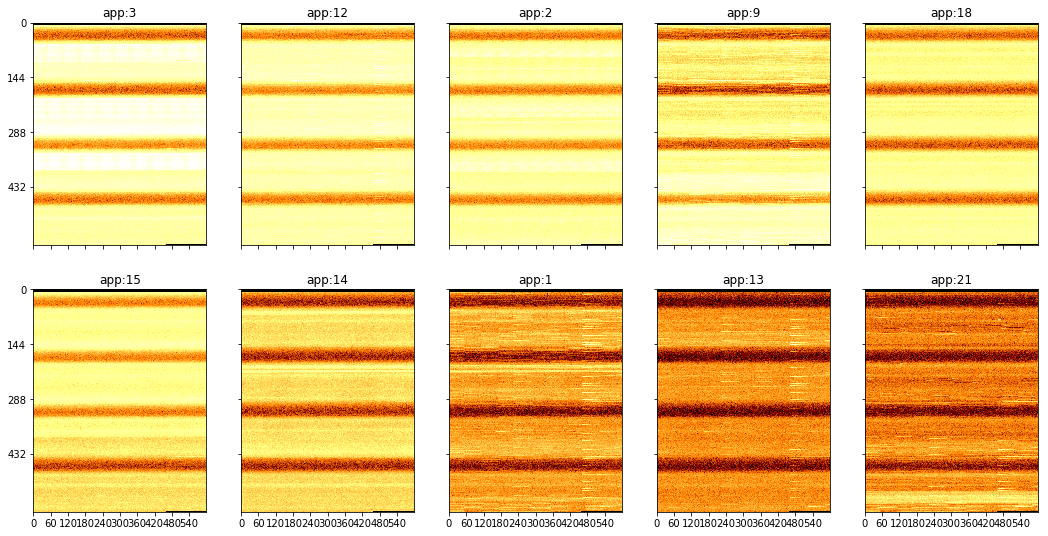

In [41]:
heat_plot(df, 'app', 't')


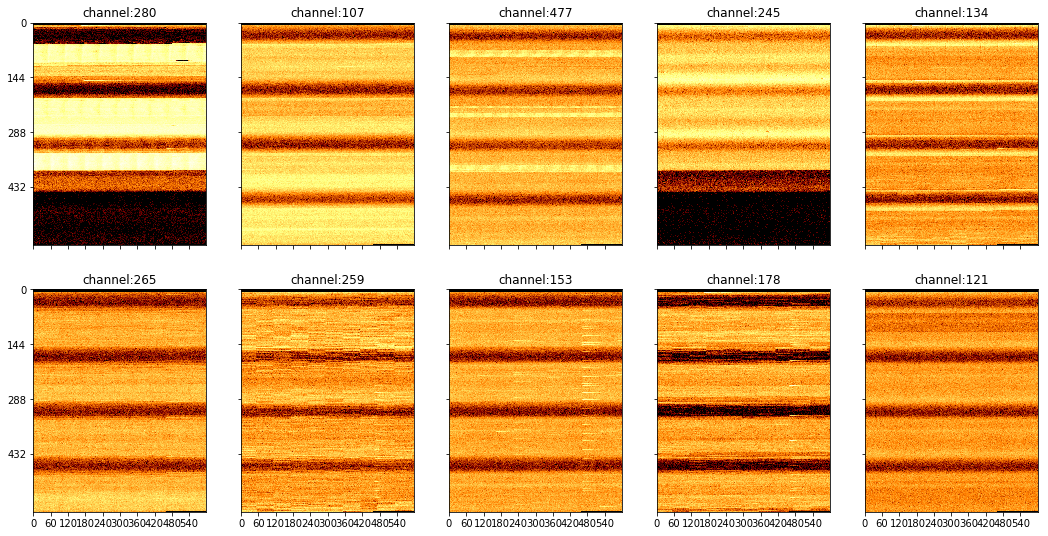

In [42]:
heat_plot(df, 'channel', 't')

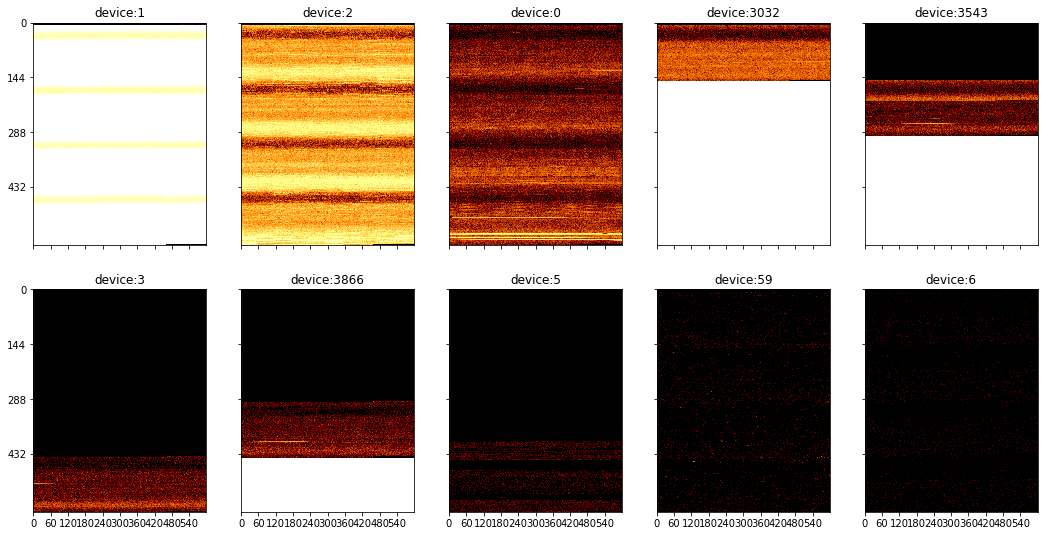

In [43]:
heat_plot(df, 'device', 't')

In [48]:
def ts_format(df, feature_name, feature_value, time_column):
    y_feat = df[df[feature_name]==feature_value][['ip', time_column]].groupby([time_column])[['ip']].count().reset_index().rename(index=str, columns={time_column: 'x'})
    xt = np.zeros((df[time_column].max()+1,), dtype=np.uint16)
    xt[y_feat['x'].values.ravel()] = y_feat.ip.values
    return xt

def ts_plot(df, feature_name, time_column):
    nrows = 2
    ncols = 5
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(18, 9))
    idx = 0

    most_common = df[feature_name].value_counts().index.values
    for r in range(nrows):
        for c in range(ncols):
            feature_value = most_common[idx]
            v = ts_format(df, feature_name, feature_value, time_column)
            if v is not None:
                v += 1 # adding 1 so vmin is not 0 (to apply log)
                ax = axes[r][c]
                ax.set_title('{}:{}'.format(feature_name, feature_value))
                ax.plot(v)
            idx += 1
    plt.show()
    


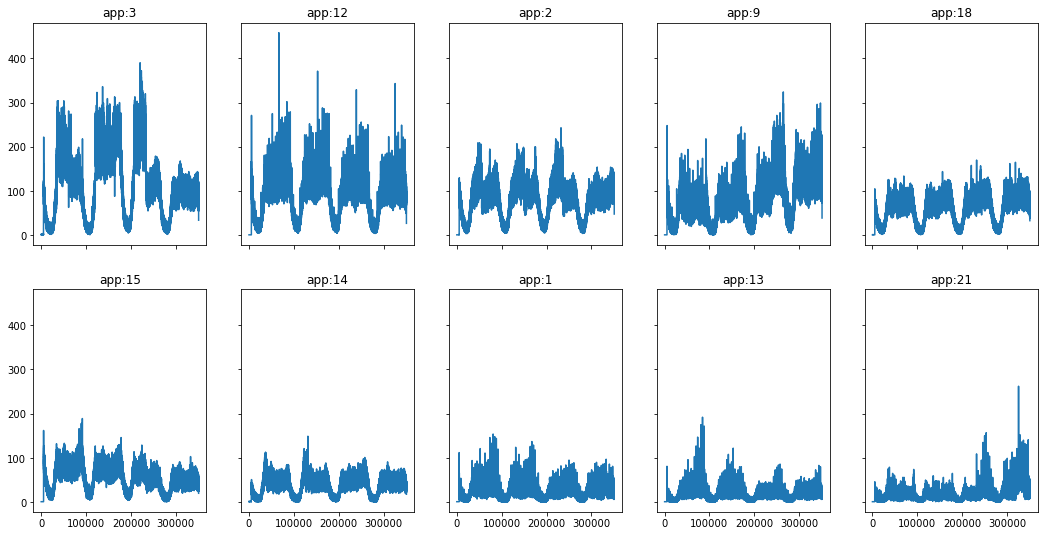

In [49]:
ts_plot(df, 'app', 't')


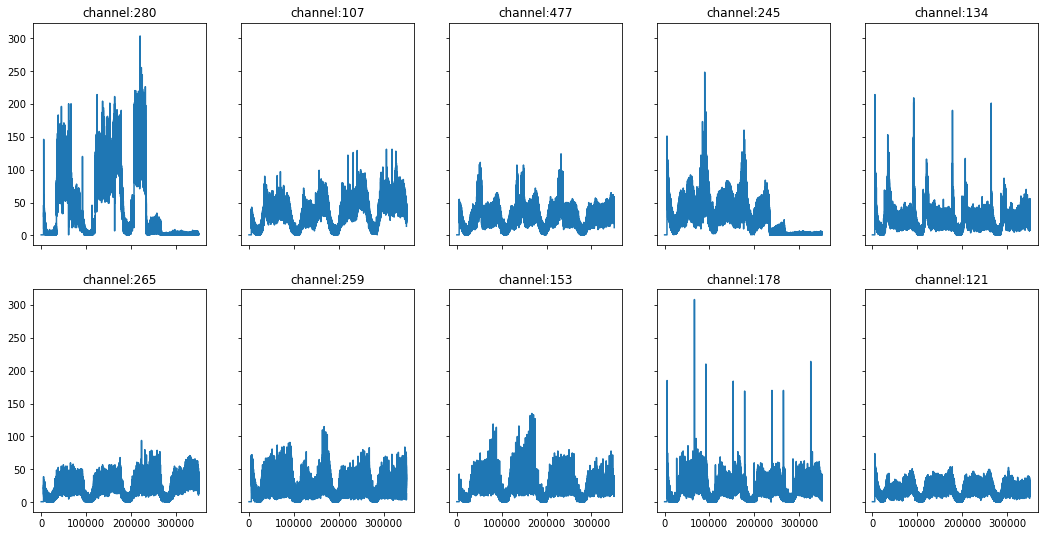

In [50]:
ts_plot(df, 'channel', 't')

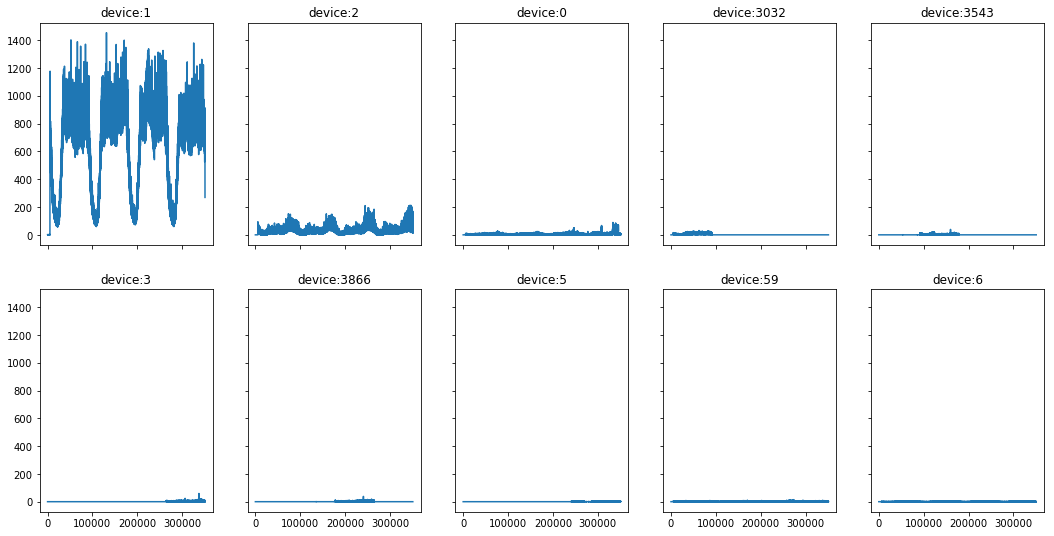

In [51]:
ts_plot(df, 'device', 't')